In [40]:
import pandas as pd

# Carregar o conjunto de dados
file_path = 'Hate_Crimes_20240707.csv'
df = pd.read_csv(file_path)

# Visualizar as primeiras linhas do conjunto de dados
df.head()


,case_number,date,weekday,victims,victim_race,victim_gender,victim_type,offenders,offender_race,offender_gender,offense,location_type,motivation
0,B16-04899,02/06/2016,Saturday,1,W,M,Individual,2.0,W,M,Simple Assault,Restaurant,Anti-Homosexual Male
1,B16-05230,02/06/2016,Saturday,1,B,M,Individual,3.0,W,M,Simple Assault,Highway,Anti-Black
2,B16-09812,03/14/2016,Monday,1,W,M,Individual,1.0,W,M,Aggravated Battery,Highway,Anti-Arab
3,B16-14685,04/18/2016,Monday,1,B,M,Individual,1.0,W,M,Simple Assault,Grocery,Anti-Black
4,B16-33336,08/23/2016,Tuesday,1,W,F,Individual,1.0,W,M,Threat/Intim,Public Bldg,Anti-Black


In [41]:
# informação do dataset e tipos de váriaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   case_number      44 non-null     object 
 1   date             43 non-null     object 
 2   weekday          44 non-null     object 
 3   victims          44 non-null     int64  
 4   victim_race      43 non-null     object 
 5   victim_gender    43 non-null     object 
 6   victim_type      44 non-null     object 
 7   offenders        40 non-null     float64
 8   offender_race    40 non-null     object 
 9   offender_gender  40 non-null     object 
 10  offense          44 non-null     object 
 11  location_type    44 non-null     object 
 12  motivation       44 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 4.6+ KB


In [42]:
# Numero de linhas e colunas
df.shape

print(f"Temos  {df.shape[0]} linhas e {df.shape[1]} colunas.")

Temos  44 linhas e 13 colunas.


In [43]:
df.dtypes

,0
case_number,object
date,object
weekday,object
victims,int64
victim_race,object
victim_gender,object
victim_type,object
offenders,float64
offender_race,object
offender_gender,object


In [44]:
df.replace({'weekday': {'Monday': 'Segunda-Feira', 'Tuesday': 'Terça-Feira', 'Wednesday': 'Quarta-Feira',
                        'Thursday': 'Quinta-Feira',
                        'Friday': 'Sexta-Feira',
                        'Saturday': 'Sábado',
                        'Sunday': 'Domingo'}}, inplace=True)

In [45]:
df.head()

,case_number,date,weekday,victims,victim_race,victim_gender,victim_type,offenders,offender_race,offender_gender,offense,location_type,motivation
0,B16-04899,02/06/2016,Sábado,1,W,M,Individual,2.0,W,M,Simple Assault,Restaurant,Anti-Homosexual Male
1,B16-05230,02/06/2016,Sábado,1,B,M,Individual,3.0,W,M,Simple Assault,Highway,Anti-Black
2,B16-09812,03/14/2016,Segunda-Feira,1,W,M,Individual,1.0,W,M,Aggravated Battery,Highway,Anti-Arab
3,B16-14685,04/18/2016,Segunda-Feira,1,B,M,Individual,1.0,W,M,Simple Assault,Grocery,Anti-Black
4,B16-33336,08/23/2016,Terça-Feira,1,W,F,Individual,1.0,W,M,Threat/Intim,Public Bldg,Anti-Black


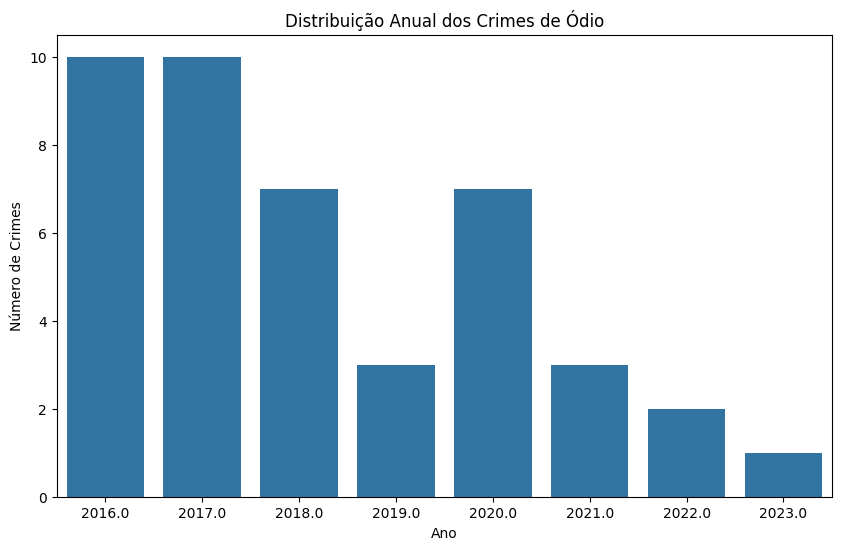

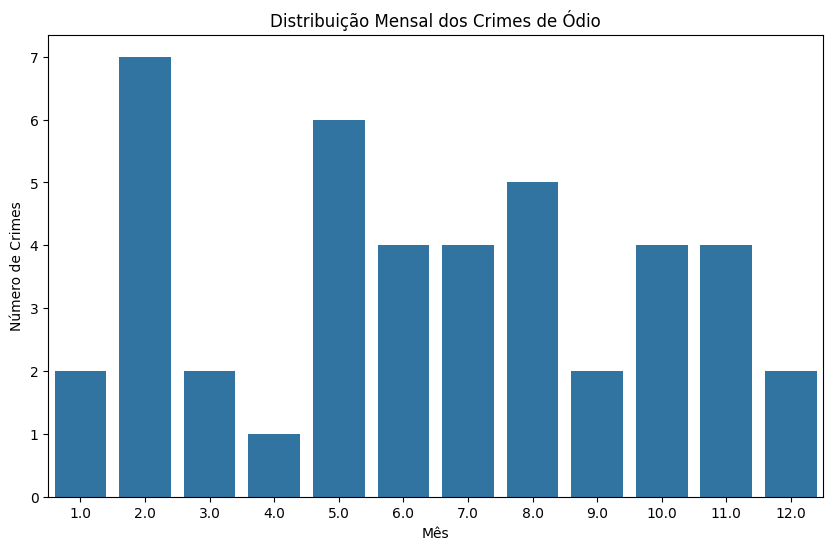

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna de data para o tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Extrair ano e mês
df['ano'] = df['date'].dt.year
df['mes'] = df['date'].dt.month

# Distribuição anual
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ano')
plt.title('Distribuição Anual dos Crimes de Ódio')
plt.xlabel('Ano')
plt.ylabel('Número de Crimes')
plt.show()

# Distribuição mensal
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='mes')
plt.title('Distribuição Mensal dos Crimes de Ódio')
plt.xlabel('Mês')
plt.ylabel('Número de Crimes')
plt.show()


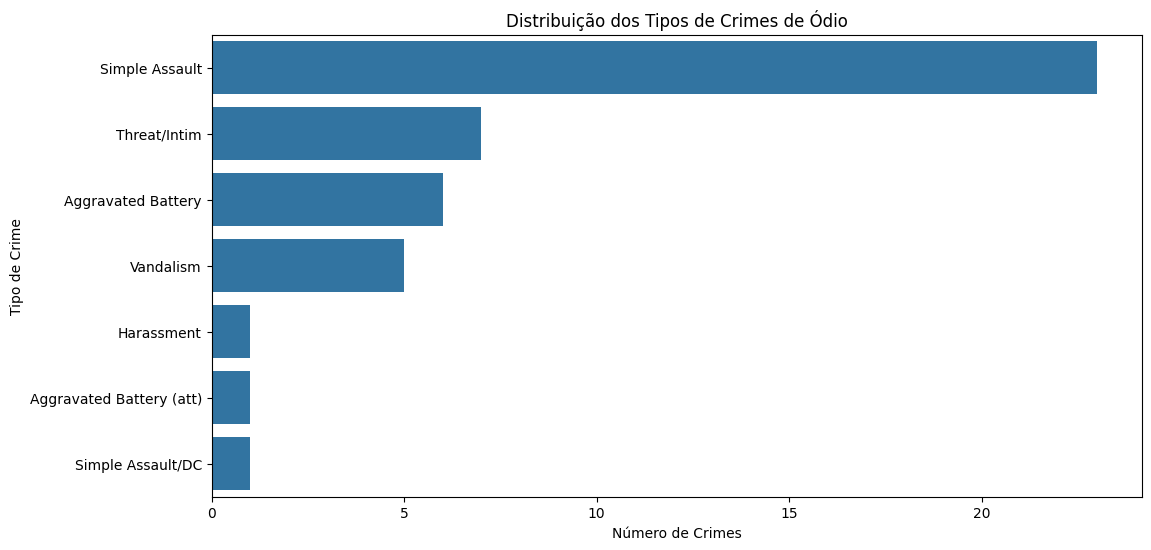

In [47]:
# Distribuição dos tipos de crimes
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='offense', order=df['offense'].value_counts().index)
plt.title('Distribuição dos Tipos de Crimes de Ódio')
plt.xlabel('Número de Crimes')
plt.ylabel('Tipo de Crime')
plt.show()


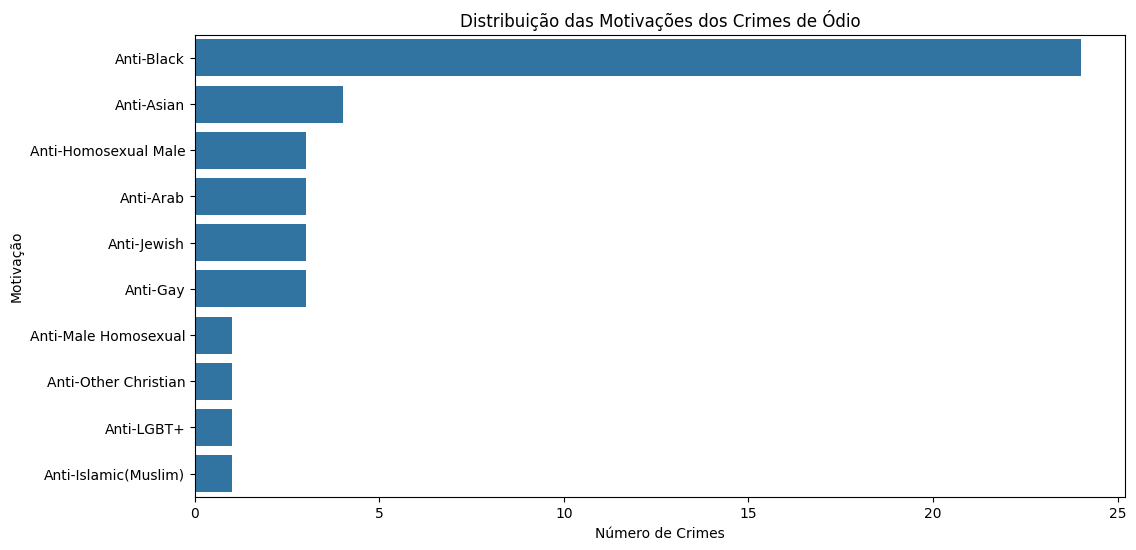

In [48]:
# Distribuição das motivações dos crimes
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='motivation', order=df['motivation'].value_counts().index)
plt.title('Distribuição das Motivações dos Crimes de Ódio')
plt.xlabel('Número de Crimes')
plt.ylabel('Motivação')
plt.show()


In [49]:
# Análise do perfil das vítimas por idade e gênero (se disponível)
if 'idade_vitima' in df.columns and 'genero_vitima' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='idade_vitima', hue='genero_vitima', multiple='stack', kde=True)
    plt.title('Distribuição de Idade das Vítimas por Gênero')
    plt.xlabel('Idade da Vítima')
    plt.ylabel('Número de Vítimas')
    plt.show()


In [50]:
# Análise do perfil dos perpetradores por idade e gênero (se disponível)
if 'idade_perpetrador' in df.columns and 'genero_perpetrador' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='idade_perpetrador', hue='genero_perpetrador', multiple='stack', kde=True)
    plt.title('Distribuição de Idade dos Perpetradores por Gênero')
    plt.xlabel('Idade do Perpetrador')
    plt.ylabel('Número de Perpetradores')
    plt.show()


In [51]:
import folium

# Verificar se as colunas de latitude e longitude estão presentes
if 'latitude' in df.columns and 'longitude' in df.columns:
    # Criar um mapa centrado em Bloomington
    mapa = folium.Map(location=[39.1653, -86.5264], zoom_start=12)

    # Adicionar marcadores para cada crime
    for index, row in df.iterrows():
        folium.Marker([row['latitude'], row['longitude']], popup=row['descricao']).add_to(mapa)

    # Salvar o mapa em um arquivo HTML
    mapa.save('mapa_crimes_de_odio.html')


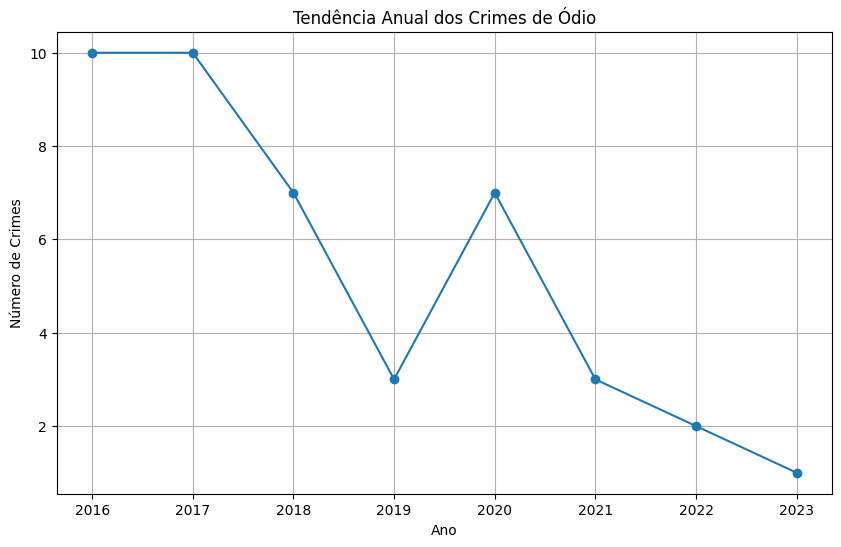

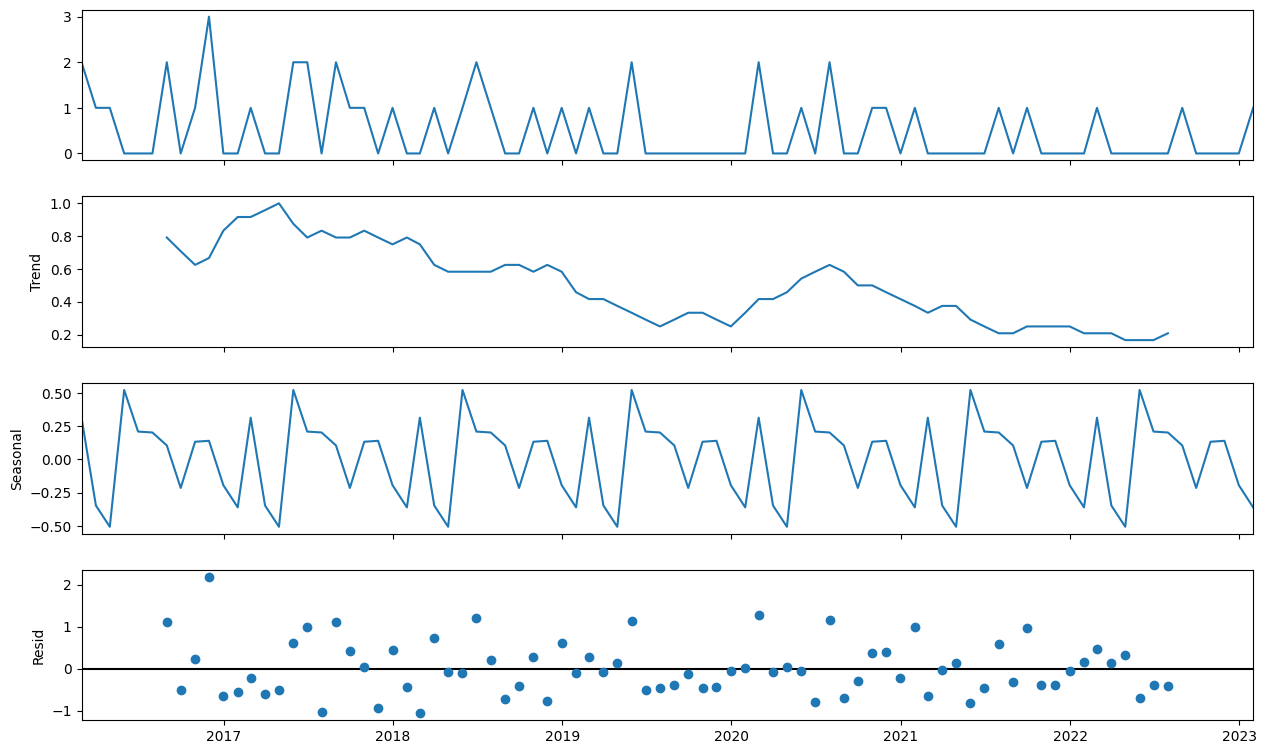

In [52]:
# Análise de tendências ao longo do tempo
plt.figure(figsize=(10, 6))
df.groupby('ano').size().plot(kind='line', marker='o')
plt.title('Tendência Anual dos Crimes de Ódio')
plt.xlabel('Ano')
plt.ylabel('Número de Crimes')
plt.grid(True)
plt.show()

# Análise de séries temporais (exemplo básico usando decomposição)
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample para dados mensais
df_monthly = df.set_index('date').resample('M').size()

# Decomposição da série temporal
decomposition = seasonal_decompose(df_monthly, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()


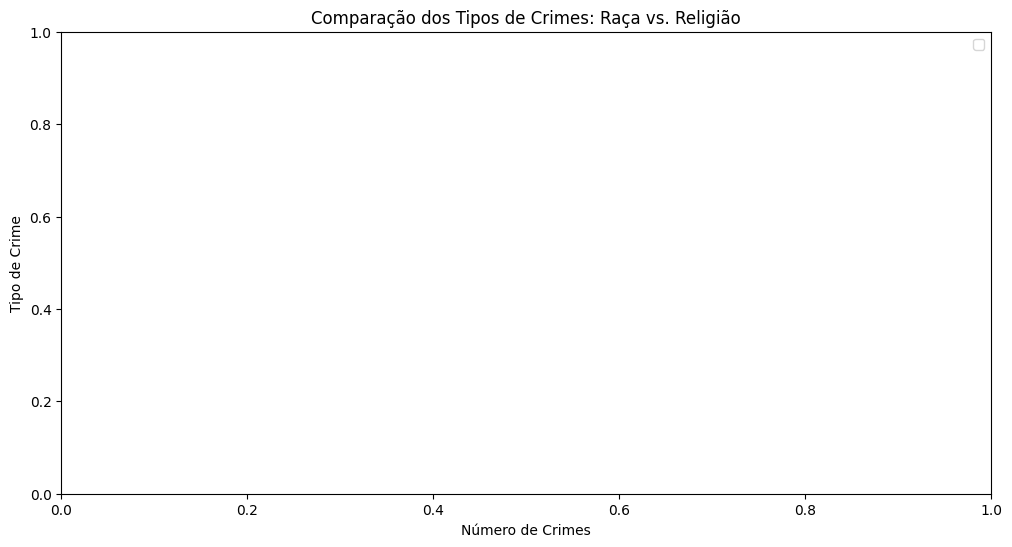

In [53]:
# Comparação de crimes motivados por raça vs. crimes motivados por religião
df_raca = df[df['motivation'] == 'Raça']
df_religiao = df[df['motivation'] == 'Religião']

plt.figure(figsize=(12, 6))
sns.countplot(data=df_raca, y='offense', order=df_raca['offense'].value_counts().index, color='blue', label='Raça')
sns.countplot(data=df_religiao, y='offense', order=df_religiao['offense'].value_counts().index, color='orange', label='Religião')
plt.title('Comparação dos Tipos de Crimes: Raça vs. Religião')
plt.xlabel('Número de Crimes')
plt.ylabel('Tipo de Crime')
plt.legend()
plt.show()


In [56]:
from sklearn.impute import SimpleImputer

# Imputar valores ausentes com a média
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.3, random_state=42)

# Treinar modelo de RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))




                    precision    recall  f1-score   support

Aggravated Battery       0.00      0.00      0.00         3
    Simple Assault       0.25      0.33      0.29         6
 Simple Assault/DC       0.00      0.00      0.00         0
      Threat/Intim       0.00      0.00      0.00         2
         Vandalism       1.00      0.33      0.50         3

          accuracy                           0.21        14
         macro avg       0.25      0.13      0.16        14
      weighted avg       0.32      0.21      0.23        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.